**Tutorial for the IRIS dataset classification by using Machine Learning**

This tutorial is referred from [github repo](https://github.com/amueller/introduction_to_ml_with_python/blob/master/01-introduction.ipynb), [kaggle kernel 1](https://www.kaggle.com/adityabhat24/iris-data-analysis-and-machine-learning-python) and 
[kaggle kernel 2](https://www.kaggle.com/ash316/ml-from-scratch-with-iris).


**Import all the necessary libraries**

In [0]:
#import all necessary libraries

%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Get the dataset**

1. Get the data from Google Drive.

The 'Iris.csv' file can be downloaded from [here](https://gist.github.com/netj/8836201).

> Upload 'Iris.csv' file to the same folder of this notebook to your google drive.

2. Get the data from Scikit-learn dataset.

The iris dataset is a dataset of three flowers. We need to predict which flowers are these based on the characteristics given. So, there are three classess and four features of these flowers.

Iris setosa (*source: wikipedia*)

![iris-setosa](https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/330px-Kosaciec_szczecinkowaty_Iris_setosa.jpg)

Iris versicolor (*source:wikipedia*)

![iris versicolor](https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/330px-Iris_versicolor_3.jpg)

Iris virginica (*source-wikipedia*)

![iris virginica](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/330px-Iris_virginica.jpg)



In [0]:
#mounting Google Drive files 
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
#check whether Iris.csv file is there or not
!ls "/content/drive/My Drive/KCG_KCGI/AIProgramming"

'GitHub Repo.gform'		   Iris.csv	   Iris_ML_solution.ipynb
'GitHub Repo (Responses).gsheet'   Iris_ML.ipynb   M19W0119.ipynb


In [0]:
#load the dataset
iris = pd.read_csv("../content/drive/My Drive/KCG_KCGI/AIProgramming/Iris.csv")
#show the data
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [0]:
#You can also use sklearn dataset to load iris dataset
from sklearn.datasets import load_iris
iris_dataset = load_iris()
df = pd.DataFrame(iris_dataset.data, columns= iris_dataset.feature_names)
df.head()

#but from now on, we are going to use the dataset from Iris.csv as our data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**Data Exploration**

In [0]:
#check if there is any inconsistensy in data
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [0]:
#remove the 1st column as it just contain an ID
iris.drop('Id', axis=1, inplace=True)

In [0]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [0]:
#get the shape of the data
print(iris.shape)

(150, 5)


In [0]:
#descriptions of the data
print(iris.describe())

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


In [0]:
#get the class distribution
print(iris.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c1a3b22b0>,
      dtype=object)

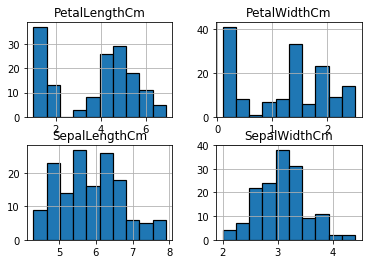

In [0]:
#histograms of every category

iris.hist(edgecolor='black', linewidth=1.2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c179edf98>,
      dtype=object)

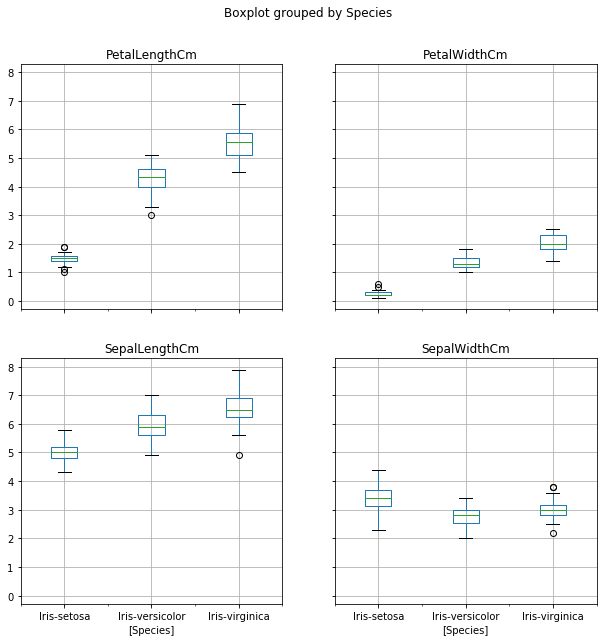

In [0]:
#boxplot on each features (categories) according to the species

iris.boxplot(by="Species", figsize=(10, 10))

**Characteristics of each species**



1.   Iris-setosa - smallest petal length and width, sepal length and highest sepal width
2.   Iris-versicolor - medium in everything
3.   Iris-virginica - largest petal length and width, sepal length and almost the same sepal width with iris-setosa



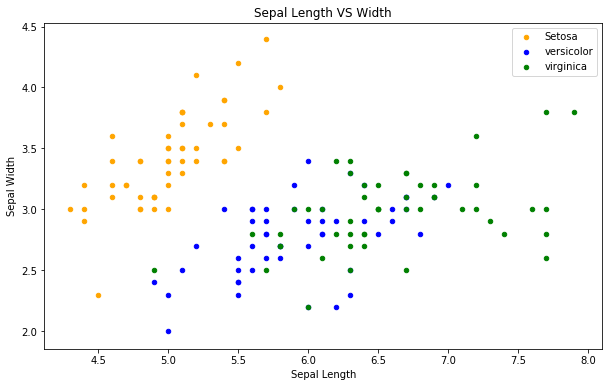

In [0]:
#Now, let's try to make a scatter plot for this data in sepal category
fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

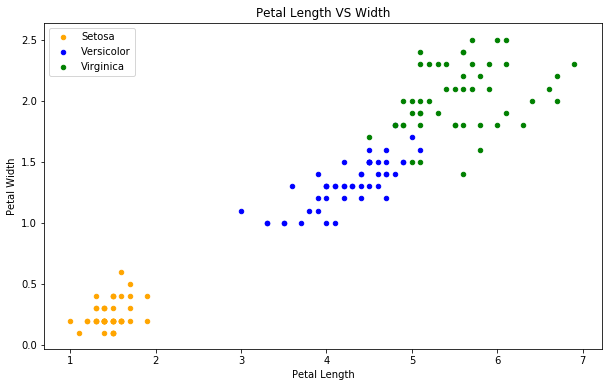

In [0]:
#Now, let's try to make a scatter plot for this data in petal category
fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='blue', label='Versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='green', label='Virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title("Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

**Plotting decision boundary for the data**

By using seaborn library and by referring to this [kaggel kernel](https://www.kaggle.com/vasanthreddy/data-visualisation-of-iris-dataset), plot a regression line or boundary line for 

1. Sepal length and sepal width
2. Petal length and petal width

for the three species of iris flower.

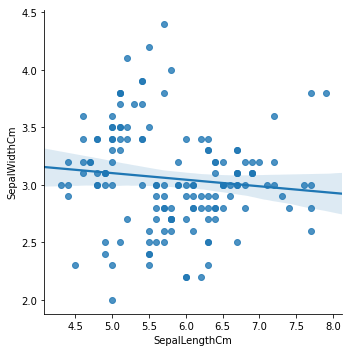

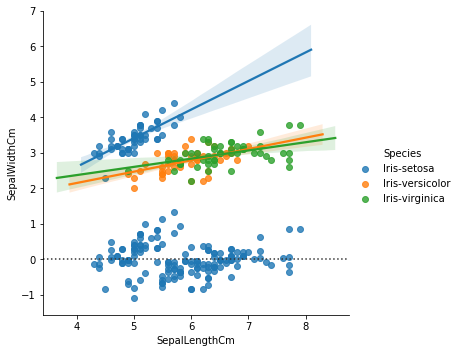

In [0]:
import seaborn as sns

sns.lmplot(x='SepalLengthCm',y='SepalWidthCm',data=iris)
sns.lmplot(x='SepalLengthCm',y='SepalWidthCm',data=iris,hue='Species')
sns.residplot(x='SepalLengthCm',y='SepalWidthCm',data=iris)

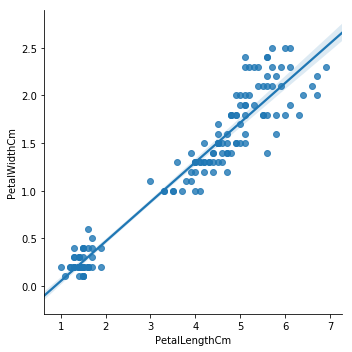

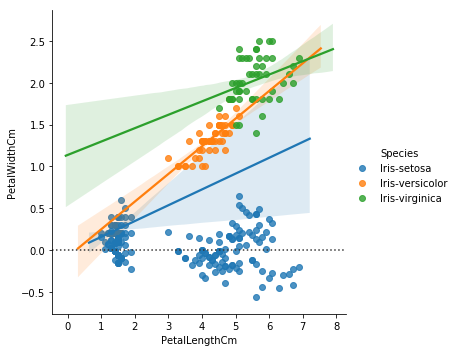

In [0]:
sns.lmplot(x='PetalLengthCm',y='PetalWidthCm',data=iris)
sns.lmplot(x='PetalLengthCm',y='PetalWidthCm',data=iris,hue='Species')
sns.residplot(x='PetalLengthCm',y='PetalWidthCm',data=iris)

**Split the data into training and test set**

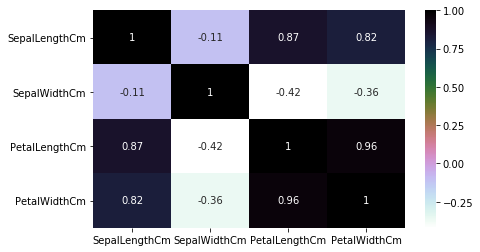

In [0]:
#check the correlation between features to choose the correct features for prediction

plt.figure(figsize=(7,4)) 
sns.heatmap(iris.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

In [0]:
#split the data into train and test set

from sklearn.model_selection import train_test_split as split
train, test = split(iris, test_size = 0.25)
#you can adjust the test size that you want to split for this dataset
print (train.shape)
print (test.shape)

(112, 5)
(38, 5)


In [0]:
#get the features for training data
X_train = train[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
#output(label) of training data
y_train = train.Species
#get the testing data features and output(label)
X_test = test[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y_test = test.Species

In [0]:
#check the train and test dataset
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
148,6.2,3.4,5.4,2.3
67,5.8,2.7,4.1,1.0
83,6.0,2.7,5.1,1.6
39,5.1,3.4,1.5,0.2
57,4.9,2.4,3.3,1.0


In [0]:
X_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
4,5.0,3.6,1.4,0.2
101,5.8,2.7,5.1,1.9
11,4.8,3.4,1.6,0.2
105,7.6,3.0,6.6,2.1
118,7.7,2.6,6.9,2.3


In [0]:
y_train.head()

148     Iris-virginica
67     Iris-versicolor
83     Iris-versicolor
39         Iris-setosa
57     Iris-versicolor
Name: Species, dtype: object

In [0]:
y_test.head()

4         Iris-setosa
101    Iris-virginica
11        Iris-setosa
105    Iris-virginica
118    Iris-virginica
Name: Species, dtype: object

**Building classification algorithms by using Scikit-Learn library**

In [0]:
#import all the necessary libraries for classification algorithms

#K-nearest neighbor classifier algorithm
from sklearn.neighbors import KNeighborsClassifier 

#Support vector machine algorithm
from sklearn import svm

#Decision Tree Classifier algorithm
from sklearn.tree import DecisionTreeClassifier

#metrics to check model accuracy
from sklearn import metrics

**Training and Predict the data by using K Neighbors Classifier**

In [0]:
knn = KNeighborsClassifier(n_neighbors=3)
#examines 3 neighbors to put new data into a class

#fit the model to the training features and labels
knn.fit(X_train, y_train)

#predict the trained model by to the validation data features
prediction = knn.predict(X_test)

#get the accuracy of the trained model by mapping the prediction data to their labels
metrics.accuracy_score(y_test, prediction)

0.9736842105263158

In [0]:
#check the prediction either it is correct or not
for true, pred in zip(y_test, prediction):
  if pred == true:
    print("{}\t -> {}".format(true, pred))
  else:
    print("\033[1m{}\t -> {}\033[0m".format(true, pred))

Iris-setosa	 -> Iris-setosa
Iris-virginica	 -> Iris-virginica
Iris-setosa	 -> Iris-setosa
Iris-virginica	 -> Iris-virginica
Iris-virginica	 -> Iris-virginica
Iris-virginica	 -> Iris-virginica
Iris-virginica	 -> Iris-virginica
Iris-virginica	 -> Iris-virginica
Iris-versicolor	 -> Iris-versicolor
Iris-versicolor	 -> Iris-versicolor
Iris-virginica	 -> Iris-virginica
Iris-setosa	 -> Iris-setosa
Iris-versicolor	 -> Iris-versicolor
Iris-versicolor	 -> Iris-versicolor
Iris-versicolor	 -> Iris-versicolor
Iris-versicolor	 -> Iris-virginica
Iris-virginica	 -> Iris-virginica
Iris-virginica	 -> Iris-virginica
Iris-virginica	 -> Iris-virginica
Iris-virginica	 -> Iris-virginica
Iris-versicolor	 -> Iris-versicolor
Iris-versicolor	 -> Iris-versicolor
Iris-setosa	 -> Iris-setosa
Iris-versicolor	 -> Iris-versicolor
Iris-setosa	 -> Iris-setosa
Iris-setosa	 -> Iris-setosa
Iris-virginica	 -> Iris-virginica
Iris-virginica	 -> Iris-virginica
Iris-versicolor	 -> Iris-versicolor
Iris-versicolor	 -> Iris-versic

([<matplotlib.axis.XTick at 0x7f5c12a7b1d0>,
 <a list of 10 Text xticklabel objects>)

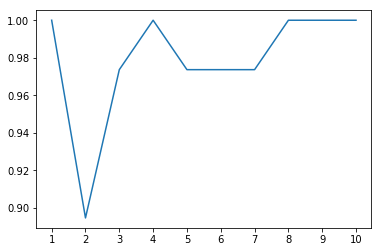

In [0]:
#checking the accuracy of various k values for KNN
a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    a=a.append(pd.Series(metrics.accuracy_score(y_test, prediction)))
plt.plot(a_index, a)
plt.xticks(x)

**Train and predict the data by using Decision Tree Classifier**

In [0]:
DT=DecisionTreeClassifier()
DT.fit(X_train,y_train)
prediction=DT.predict(X_test)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(y_test, prediction))

The accuracy of the Decision Tree is 0.9736842105263158


In [0]:
for true, pred in zip(y_test, prediction):
  if pred == true:
    print("{}\t -> {}".format(true, pred))
  else:
    print("\033[1m{}\t -> {}\033[0m".format(true, pred))

Iris-setosa	 -> Iris-setosa
Iris-virginica	 -> Iris-virginica
Iris-setosa	 -> Iris-setosa
Iris-virginica	 -> Iris-virginica
Iris-virginica	 -> Iris-virginica
Iris-virginica	 -> Iris-virginica
Iris-virginica	 -> Iris-virginica
Iris-virginica	 -> Iris-virginica
Iris-versicolor	 -> Iris-versicolor
Iris-versicolor	 -> Iris-versicolor
Iris-virginica	 -> Iris-virginica
Iris-setosa	 -> Iris-setosa
Iris-versicolor	 -> Iris-versicolor
Iris-versicolor	 -> Iris-versicolor
Iris-versicolor	 -> Iris-versicolor
Iris-versicolor	 -> Iris-versicolor
Iris-virginica	 -> Iris-virginica
Iris-virginica	 -> Iris-versicolor
Iris-virginica	 -> Iris-virginica
Iris-virginica	 -> Iris-virginica
Iris-versicolor	 -> Iris-versicolor
Iris-versicolor	 -> Iris-versicolor
Iris-setosa	 -> Iris-setosa
Iris-versicolor	 -> Iris-versicolor
Iris-setosa	 -> Iris-setosa
Iris-setosa	 -> Iris-setosa
Iris-virginica	 -> Iris-virginica
Iris-virginica	 -> Iris-virginica
Iris-versicolor	 -> Iris-versicolor
Iris-versicolor	 -> Iris-vers

**Train and predict the data by using SVM**

In [0]:
SVM = svm.SVC() #select the algorithm
SVM.fit(X_train,y_train) # we train the algorithm with the training data and the training output
prediction=SVM.predict(X_test) #now we pass the testing data to the trained algorithm
print('The accuracy of the SVM is:',metrics.accuracy_score(y_test, prediction))#now we check the accuracy of the algorithm. 
#we pass the predicted output by the model and the actual output

The accuracy of the SVM is: 1.0


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [0]:
for true, pred in zip(y_test, prediction):
  if pred == true:
    print("{}\t -> {}".format(true, pred))
  else:
    print("\033[1m{}\t -> {}\033[0m".format(true, pred))

Iris-setosa	 -> Iris-setosa
Iris-virginica	 -> Iris-virginica
Iris-setosa	 -> Iris-setosa
Iris-virginica	 -> Iris-virginica
Iris-virginica	 -> Iris-virginica
Iris-virginica	 -> Iris-virginica
Iris-virginica	 -> Iris-virginica
Iris-virginica	 -> Iris-virginica
Iris-versicolor	 -> Iris-versicolor
Iris-versicolor	 -> Iris-versicolor
Iris-virginica	 -> Iris-virginica
Iris-setosa	 -> Iris-setosa
Iris-versicolor	 -> Iris-versicolor
Iris-versicolor	 -> Iris-versicolor
Iris-versicolor	 -> Iris-versicolor
Iris-versicolor	 -> Iris-versicolor
Iris-virginica	 -> Iris-virginica
Iris-virginica	 -> Iris-virginica
Iris-virginica	 -> Iris-virginica
Iris-virginica	 -> Iris-virginica
Iris-versicolor	 -> Iris-versicolor
Iris-versicolor	 -> Iris-versicolor
Iris-setosa	 -> Iris-setosa
Iris-versicolor	 -> Iris-versicolor
Iris-setosa	 -> Iris-setosa
Iris-setosa	 -> Iris-setosa
Iris-virginica	 -> Iris-virginica
Iris-virginica	 -> Iris-virginica
Iris-versicolor	 -> Iris-versicolor
Iris-versicolor	 -> Iris-versi

**Confusion matrix for predicted iris dataset**

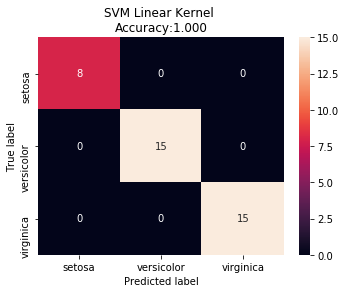

In [0]:
#Confusion matrix after SVM

from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

cm = confusion_matrix(y_test, prediction)

cm_df = pd.DataFrame(cm,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, prediction)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()